#Team 8:
Question 3: Do relationship representation profiles remain stable across release eras, or do distinct temporal patterns emerge that suggest shifts or persistence in industry norms over time?

Name:Yun-Hsuan Ku

#Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2023/2023-02-14/age_gaps.csv"
age_gaps = pd.read_csv(url)

age_gaps.columns = age_gaps.columns.str.lower()

# parse dates
date_cols = [c for c in age_gaps.columns if "birthdate" in c]
for c in date_cols:
    age_gaps[c] = pd.to_datetime(age_gaps[c], errors="coerce")

age_gaps.info()
age_gaps.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_name          1155 non-null   object        
 1   release_year        1155 non-null   int64         
 2   director            1155 non-null   object        
 3   age_difference      1155 non-null   int64         
 4   couple_number       1155 non-null   int64         
 5   actor_1_name        1155 non-null   object        
 6   actor_2_name        1155 non-null   object        
 7   character_1_gender  1155 non-null   object        
 8   character_2_gender  1155 non-null   object        
 9   actor_1_birthdate   1155 non-null   datetime64[ns]
 10  actor_2_birthdate   1155 non-null   datetime64[ns]
 11  actor_1_age         1155 non-null   int64         
 12  actor_2_age         1155 non-null   int64         
dtypes: datetime64[ns](2), int64(5), object(6)
memory

,movie_name,release_year,director,age_difference,couple_number,actor_1_name,actor_2_name,character_1_gender,character_2_gender,actor_1_birthdate,actor_2_birthdate,actor_1_age,actor_2_age
0,Harold and Maude,1971,Hal Ashby,52,1,Ruth Gordon,Bud Cort,woman,man,1896-10-30,1948-03-29,75,23
1,Venus,2006,Roger Michell,50,1,Peter O'Toole,Jodie Whittaker,man,woman,1932-08-02,1982-06-03,74,24
2,The Quiet American,2002,Phillip Noyce,49,1,Michael Caine,Do Thi Hai Yen,man,woman,1933-03-14,1982-10-01,69,20
3,The Big Lebowski,1998,Joel Coen,45,1,David Huddleston,Tara Reid,man,woman,1930-09-17,1975-11-08,68,23
4,Beginners,2010,Mike Mills,43,1,Christopher Plummer,Goran Visnjic,man,man,1929-12-13,1972-09-09,81,38


## EDA & Pre-Process data


In [2]:
age_gaps.isna().sum()

,0
movie_name,0
release_year,0
director,0
age_difference,0
couple_number,0
actor_1_name,0
actor_2_name,0
character_1_gender,0
character_2_gender,0
actor_1_birthdate,0


In [3]:
age_gaps.describe()

,release_year,age_difference,couple_number,actor_1_birthdate,actor_2_birthdate,actor_1_age,actor_2_age
count,1155.000000,1155.000000,1155.000000,1155,1155,1155.000000,1155.000000
mean,2000.799134,10.424242,1.398268,1960-09-07 07:15:07.012987008,1971-01-29 13:09:11.688311688,40.635498,30.211255
min,1935.000000,0.000000,1.000000,1889-04-16 00:00:00,1906-10-06 00:00:00,18.000000,17.000000
25%,1997.000000,4.000000,1.000000,1953-05-16 00:00:00,1965-03-25 00:00:00,33.000000,25.000000
50%,2004.000000,8.000000,1.000000,1964-10-03 00:00:00,1974-07-30 00:00:00,39.000000,29.000000
75%,2012.000000,15.000000,2.000000,1973-08-07 12:00:00,1982-04-07 00:00:00,47.000000,34.000000
max,2022.000000,52.000000,7.000000,1996-06-01 00:00:00,1996-11-11 00:00:00,81.000000,68.000000
std,16.365819,8.511086,0.754419,NaN,NaN,10.424173,7.495952


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

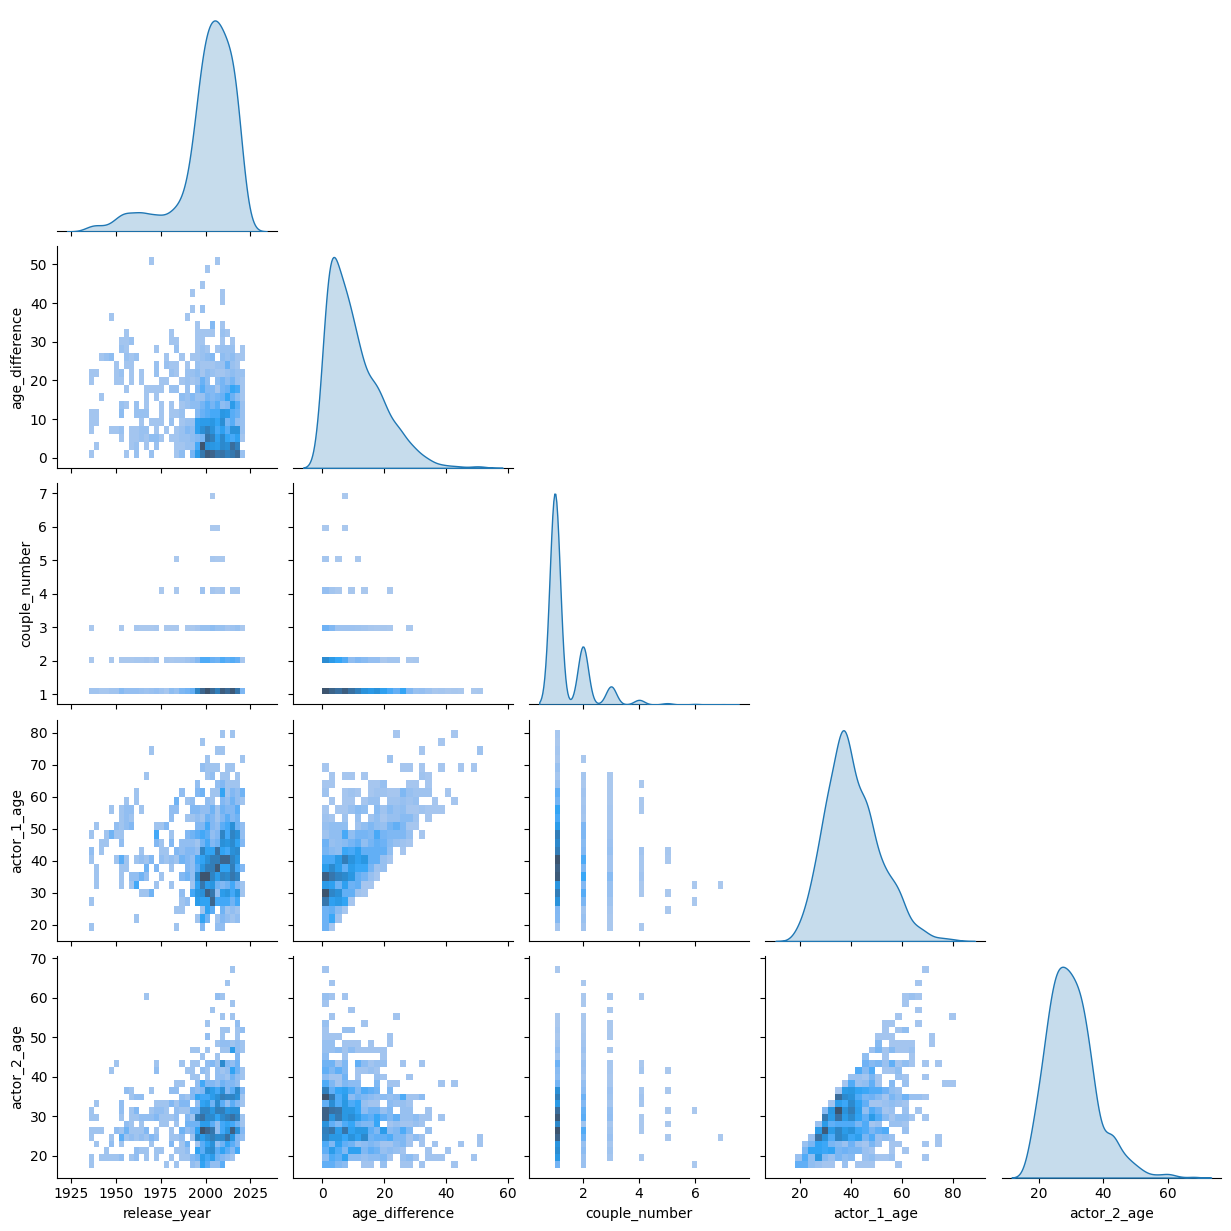

In [5]:
sns.pairplot(age_gaps, kind="hist", diag_kind="kde", corner=True)

Correlation (Pearson): -0.204
Correlation (Spearman): -0.141


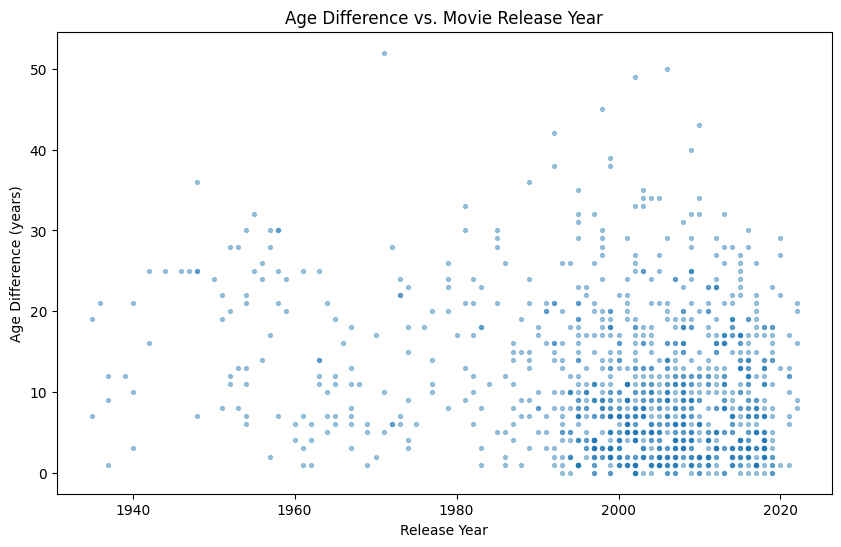

In [6]:
# Release year vs. age gap
import matplotlib.pyplot as plt

# correlation
pearson  = age_gaps["release_year"].corr(age_gaps["age_difference"], method="pearson")
spearman = age_gaps["release_year"].corr(age_gaps["age_difference"], method="spearman")

print(f"Correlation (Pearson): {pearson:.3f}")
print(f"Correlation (Spearman): {spearman:.3f}")

# scatter plot
plt.figure(figsize=(10,6))
plt.scatter(age_gaps["release_year"], age_gaps["age_difference"], s=8, alpha=0.4)

plt.title("Age Difference vs. Movie Release Year")
plt.xlabel("Release Year")
plt.ylabel("Age Difference (years)")
plt.show()



In [7]:
# Is the older partner usually the man?

g1 = "character_1_gender"
g2 = "character_2_gender"

# Define who is older based on gaps
age_gaps["actor_1_older"] = age_gaps["actor_1_age"] > age_gaps["actor_2_age"]
age_gaps["actor_2_older"] = age_gaps["actor_2_age"] > age_gaps["actor_1_age"]
age_gaps["same_age"] = age_gaps["actor_1_age"] == age_gaps["actor_2_age"]

def older_is_man(row):
    if pd.isna(row[g1]) or pd.isna(row[g2]):
        return np.nan
    if row["actor_1_older"]:
        return row[g1] == "man"
    if row["actor_2_older"]:
        return row[g2] == "man"
    return np.nan

age_gaps["older_is_man"] = age_gaps.apply(older_is_man, axis=1)

p_older_is_man = age_gaps["older_is_man"].mean(skipna=True)
print(f"P(older partner is a man) = {p_older_is_man:.3f}")

# Show gender pairing counts
pair_counts = age_gaps.groupby([g1, g2]).size().reset_index(name="count").sort_values("count", ascending=False)
display(pair_counts)

P(older partner is a man) = 0.826


,character_1_gender,character_2_gender,count
1,man,woman,929
2,woman,man,203
0,man,man,12
3,woman,woman,11


#Feature Engnieering

In [8]:
import numpy as np

df = age_gaps.copy()

# define new variable : mean age of couple
df["mean_age_of_couple"] = (df["actor_1_age"] + df["actor_2_age"])/2
df


,movie_name,release_year,director,age_difference,couple_number,actor_1_name,actor_2_name,character_1_gender,character_2_gender,actor_1_birthdate,actor_2_birthdate,actor_1_age,actor_2_age,actor_1_older,actor_2_older,same_age,older_is_man,mean_age_of_couple
0,Harold and Maude,1971,Hal Ashby,52,1,Ruth Gordon,Bud Cort,woman,man,1896-10-30,1948-03-29,75,23,True,False,False,False,49.0
1,Venus,2006,Roger Michell,50,1,Peter O'Toole,Jodie Whittaker,man,woman,1932-08-02,1982-06-03,74,24,True,False,False,True,49.0
2,The Quiet American,2002,Phillip Noyce,49,1,Michael Caine,Do Thi Hai Yen,man,woman,1933-03-14,1982-10-01,69,20,True,False,False,True,44.5
3,The Big Lebowski,1998,Joel Coen,45,1,David Huddleston,Tara Reid,man,woman,1930-09-17,1975-11-08,68,23,True,False,False,True,45.5
4,Beginners,2010,Mike Mills,43,1,Christopher Plummer,Goran Visnjic,man,man,1929-12-13,1972-09-09,81,38,True,False,False,True,59.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,The Hunger Games: Catching Fire,2013,Francis Lawrence,0,1,Liam Hemsworth,Jennifer Lawrence,man,woman,1990-01-13,1990-08-15,23,23,False,False,True,NaN,23.0
1151,The Lake House,2006,Alejandro Agresti,0,1,Sandra Bullock,Keanu Reeves,woman,man,1964-07-26,1964-09-02,42,42,False,False,True,NaN,42.0
1152,Tolkien,2019,Dome Karukoski,0,1,Lily Collins,Nicholas Hoult,woman,man,1989-03-18,1989-12-07,30,30,False,False,True,NaN,30.0
1153,Transformers,2007,Michael Bay,0,1,Megan Fox,Shia LaBeouf,woman,man,1986-05-16,1986-06-11,21,21,False,False,True,NaN,21.0


In [9]:
#define relationship group variable
df["relationship_type"] = np.where(
    df["character_1_gender"] == df["character_2_gender"],
    "Same-gender",
    "Heterosexual"
)


In [10]:
df

,movie_name,release_year,director,age_difference,couple_number,actor_1_name,actor_2_name,character_1_gender,character_2_gender,actor_1_birthdate,actor_2_birthdate,actor_1_age,actor_2_age,actor_1_older,actor_2_older,same_age,older_is_man,mean_age_of_couple,relationship_type
0,Harold and Maude,1971,Hal Ashby,52,1,Ruth Gordon,Bud Cort,woman,man,1896-10-30,1948-03-29,75,23,True,False,False,False,49.0,Heterosexual
1,Venus,2006,Roger Michell,50,1,Peter O'Toole,Jodie Whittaker,man,woman,1932-08-02,1982-06-03,74,24,True,False,False,True,49.0,Heterosexual
2,The Quiet American,2002,Phillip Noyce,49,1,Michael Caine,Do Thi Hai Yen,man,woman,1933-03-14,1982-10-01,69,20,True,False,False,True,44.5,Heterosexual
3,The Big Lebowski,1998,Joel Coen,45,1,David Huddleston,Tara Reid,man,woman,1930-09-17,1975-11-08,68,23,True,False,False,True,45.5,Heterosexual
4,Beginners,2010,Mike Mills,43,1,Christopher Plummer,Goran Visnjic,man,man,1929-12-13,1972-09-09,81,38,True,False,False,True,59.5,Same-gender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,The Hunger Games: Catching Fire,2013,Francis Lawrence,0,1,Liam Hemsworth,Jennifer Lawrence,man,woman,1990-01-13,1990-08-15,23,23,False,False,True,NaN,23.0,Heterosexual
1151,The Lake House,2006,Alejandro Agresti,0,1,Sandra Bullock,Keanu Reeves,woman,man,1964-07-26,1964-09-02,42,42,False,False,True,NaN,42.0,Heterosexual
1152,Tolkien,2019,Dome Karukoski,0,1,Lily Collins,Nicholas Hoult,woman,man,1989-03-18,1989-12-07,30,30,False,False,True,NaN,30.0,Heterosexual
1153,Transformers,2007,Michael Bay,0,1,Megan Fox,Shia LaBeouf,woman,man,1986-05-16,1986-06-11,21,21,False,False,True,NaN,21.0,Heterosexual


In [11]:
df.describe()

,release_year,age_difference,couple_number,actor_1_birthdate,actor_2_birthdate,actor_1_age,actor_2_age,mean_age_of_couple
count,1155.000000,1155.000000,1155.000000,1155,1155,1155.000000,1155.000000,1155.000000
mean,2000.799134,10.424242,1.398268,1960-09-07 07:15:07.012987008,1971-01-29 13:09:11.688311688,40.635498,30.211255,35.423377
min,1935.000000,0.000000,1.000000,1889-04-16 00:00:00,1906-10-06 00:00:00,18.000000,17.000000,18.000000
25%,1997.000000,4.000000,1.000000,1953-05-16 00:00:00,1965-03-25 00:00:00,33.000000,25.000000,30.000000
50%,2004.000000,8.000000,1.000000,1964-10-03 00:00:00,1974-07-30 00:00:00,39.000000,29.000000,34.500000
75%,2012.000000,15.000000,2.000000,1973-08-07 12:00:00,1982-04-07 00:00:00,47.000000,34.000000,39.750000
max,2022.000000,52.000000,7.000000,1996-06-01 00:00:00,1996-11-11 00:00:00,81.000000,68.000000,69.000000
std,16.365819,8.511086,0.754419,NaN,NaN,10.424173,7.495952,8.019769


based on my EDA, I found that actor 1's age always older than actor 2's age

#Q1. Do we have same gender couple?

In [12]:
df["relationship_type"].value_counts()




,count
relationship_type,
Heterosexual,1132
Same-gender,23


# Q2. Do same-gender couples have different age gaps than heterosexual couples?

In [13]:
df.groupby("relationship_type")["age_difference"].agg(["mean","median","std","count"])



,mean,median,std,count
relationship_type,,,,
Heterosexual,10.365724,8.0,8.452007,1132
Same-gender,13.304348,10.0,10.881322,23


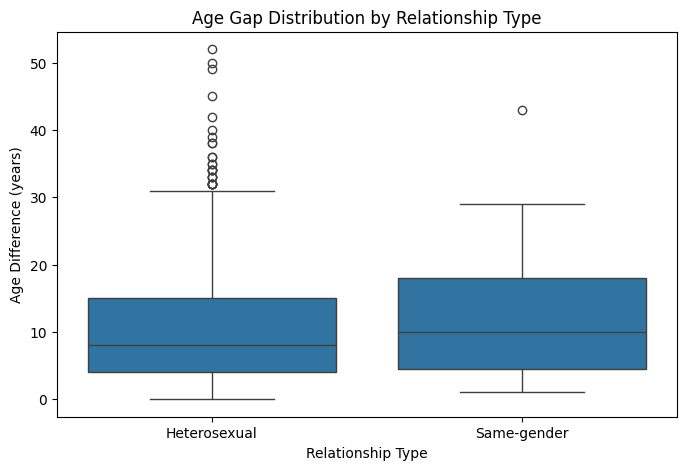

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

sns.boxplot(
    data=df,
    x="relationship_type",
    y="age_difference"
)

plt.title("Age Gap Distribution by Relationship Type")
plt.xlabel("Relationship Type")
plt.ylabel("Age Difference (years)")

plt.show()



#Feature Normalization

In [15]:
#build cluster matrix
cluster_df = df[[
    "age_difference",
    "mean_age_of_couple"
]]
cluster_df

,age_difference,mean_age_of_couple
0,52,49.0
1,50,49.0
2,49,44.5
3,45,45.5
4,43,59.5
...,...,...
1150,0,23.0
1151,0,42.0
1152,0,30.0
1153,0,21.0


In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
# Normalize df
df_normalized = pd.DataFrame(sc.fit_transform(cluster_df), columns=cluster_df.columns)

df_normalized


,age_difference,mean_age_of_couple
0,4.887011,1.693628
1,4.651921,1.693628
2,4.534377,1.132271
3,4.064198,1.257017
4,3.829108,3.003460
...,...,...
1150,-1.225315,-1.549765
1151,-1.225315,0.820407
1152,-1.225315,-0.676544
1153,-1.225315,-1.799257


#K-means Cluster

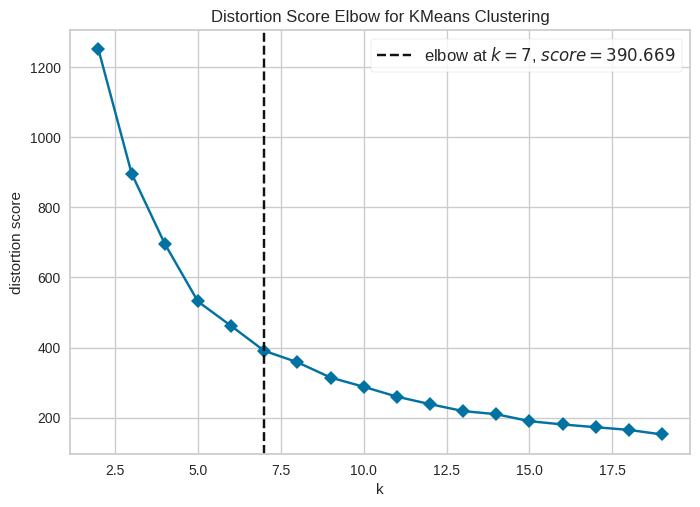

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

clustering = KMeans(random_state=42)
visualizer = KElbowVisualizer(
    clustering, k=(2, 20), metric='distortion', timings=False, random_state=42  #metric='silhouette' metric='distortion'
)

visualizer.fit(df_normalized)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

I first tried k = 2 to 20, but this divided the data into too many pieces, so I then tried a smaller k.

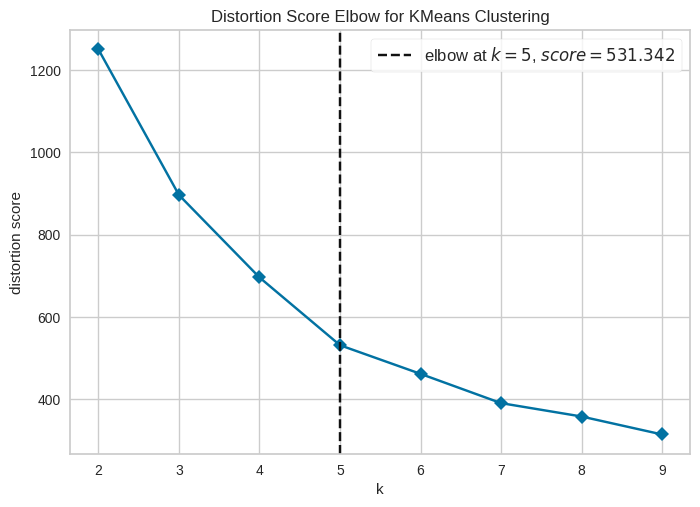

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

clustering = KMeans(random_state=42)
visualizer = KElbowVisualizer(
    clustering, k=(2, 10), metric='distortion', timings=False, random_state=42  #metric='silhouette' metric='distortion'
)

visualizer.fit(df_normalized)        # Fit the data to the visualizer
visualizer.show()

In [19]:
from sklearn.cluster import KMeans

for k in [3,4,5]:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(df_normalized)
    print("k =", k)
    print(pd.Series(labels).value_counts(), "\n")


k = 3
0    598
1    289
2    268
Name: count, dtype: int64 

k = 4
1    468
0    312
2    225
3    150
Name: count, dtype: int64 

k = 5
1    317
4    304
0    269
3    138
2    127
Name: count, dtype: int64 



I want to examine how many data points fall into each cluster to decide the best value of k and avoid having clusters with too few observations.

In [20]:
n_clusters_kmeans = 3

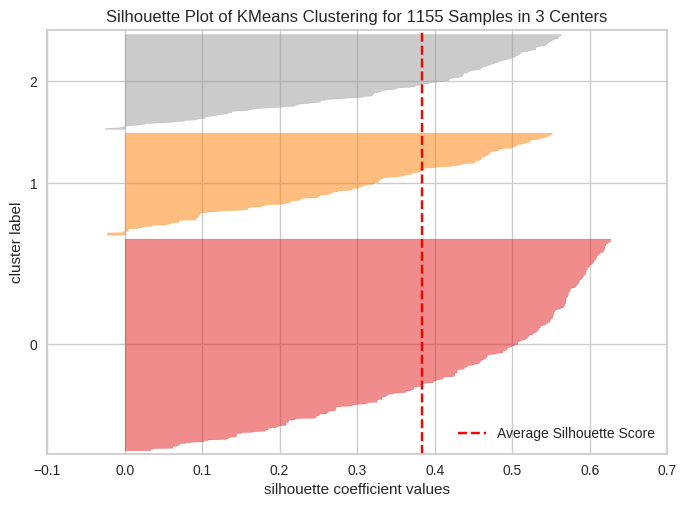

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1155 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [21]:
from yellowbrick.cluster import SilhouetteVisualizer

kmeans_model = KMeans(n_clusters_kmeans, random_state=42)
visualizer = SilhouetteVisualizer(kmeans_model, timings=False)

visualizer.fit(df_normalized)        # Fit the data to the visualizer
visualizer.show()

In [22]:
# build final kmeans model (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)

df["cluster"] = kmeans.fit_predict(df_normalized)


In [23]:
df["cluster"].value_counts().sort_index()
df["cluster"].unique()


array([2, 0, 1], dtype=int32)

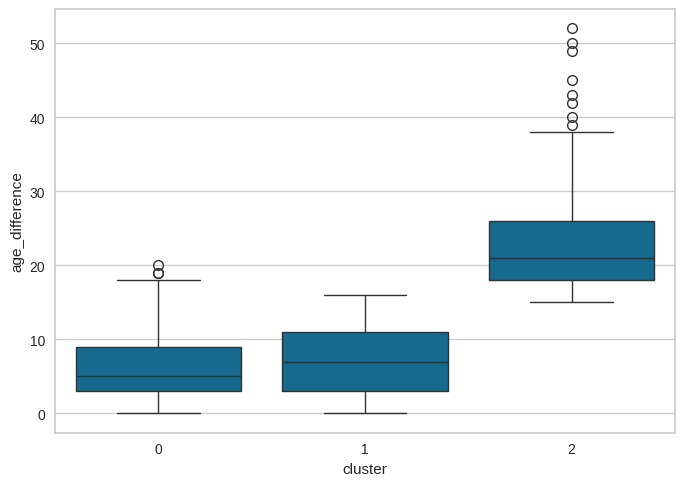

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x="cluster", y="age_difference")
plt.show()


In [41]:
data_plot=df.copy()
data_plot=df.drop(columns=['character_1_gender',	'character_2_gender', 'couple_number', 'actor_1_age',	'actor_2_age','actor_1_older','actor_2_older'	,'same_age'	])

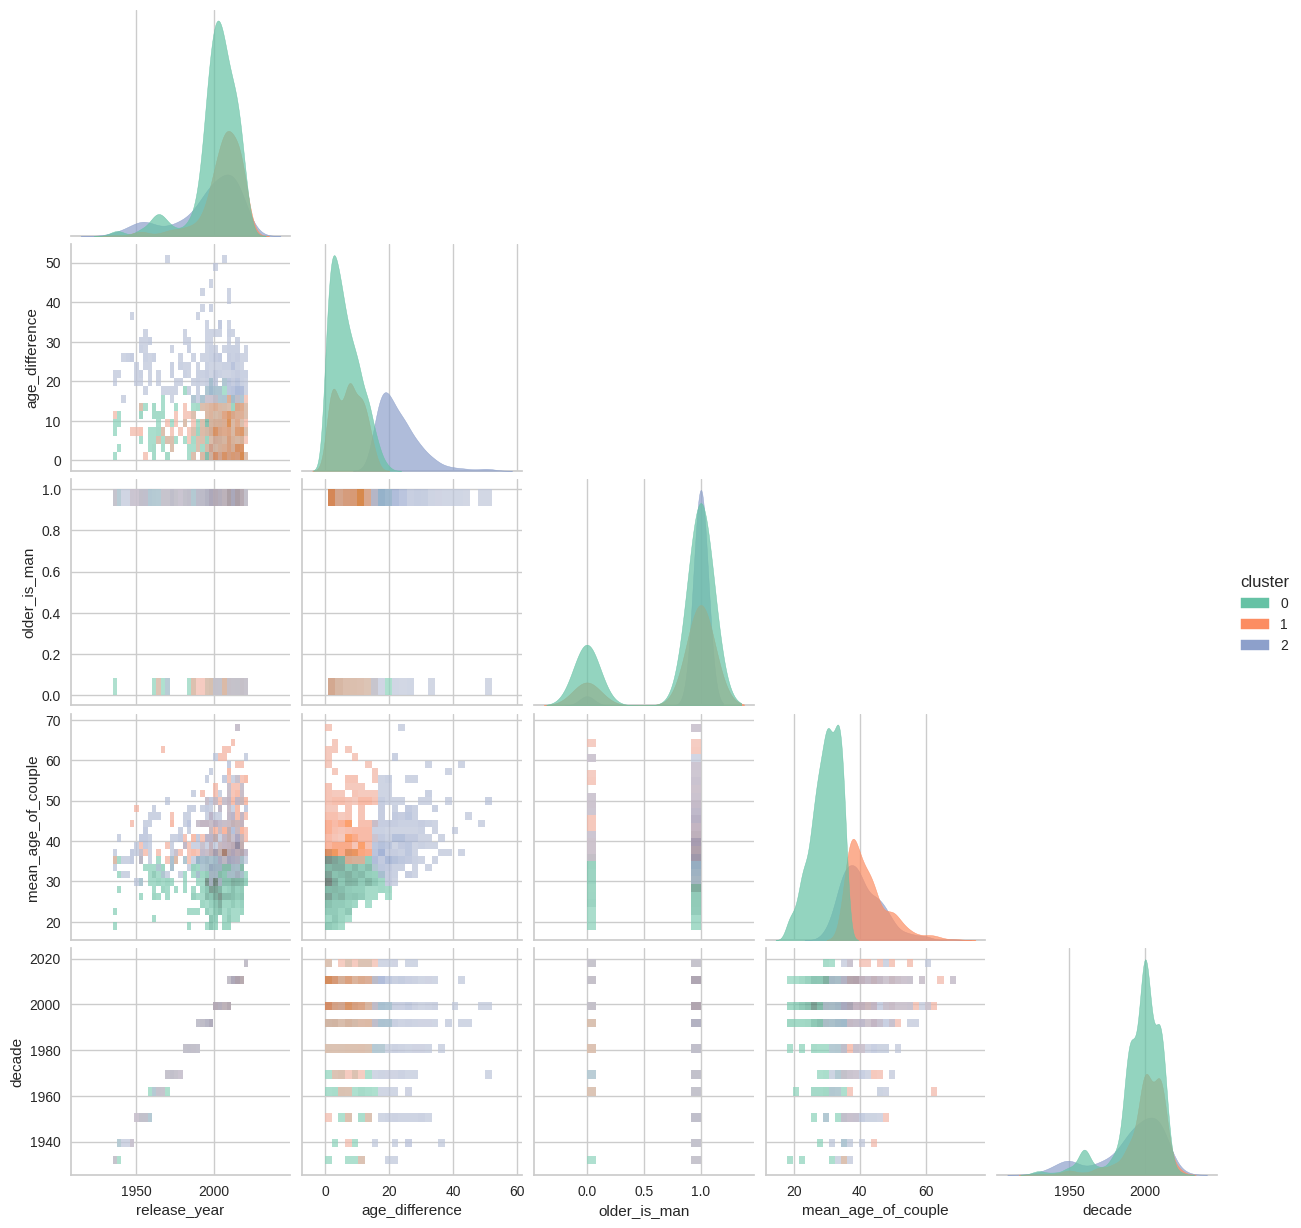

In [42]:
#K-means cluster pairplot
data_plot["cluster"] = df["cluster"]

sns.pairplot(data_plot, hue="cluster", kind="hist", diag_kind="kde", corner=True, palette="Set2",
    plot_kws={'alpha': 0.7}, # Adjusts transparency of the scatter points (0.0 to 1.0)
    diag_kws={'alpha': 0.7}  # Adjusts transparency of the diagonal plots (histograms/KDEs)
    )

#Interpretation of final result

In [28]:
# add cluster label into original dataframe to compare each cluster
df.head()

,movie_name,release_year,director,age_difference,couple_number,actor_1_name,actor_2_name,character_1_gender,character_2_gender,actor_1_birthdate,actor_2_birthdate,actor_1_age,actor_2_age,actor_1_older,actor_2_older,same_age,older_is_man,mean_age_of_couple,relationship_type,cluster
0,Harold and Maude,1971,Hal Ashby,52,1,Ruth Gordon,Bud Cort,woman,man,1896-10-30,1948-03-29,75,23,True,False,False,False,49.0,Heterosexual,2
1,Venus,2006,Roger Michell,50,1,Peter O'Toole,Jodie Whittaker,man,woman,1932-08-02,1982-06-03,74,24,True,False,False,True,49.0,Heterosexual,2
2,The Quiet American,2002,Phillip Noyce,49,1,Michael Caine,Do Thi Hai Yen,man,woman,1933-03-14,1982-10-01,69,20,True,False,False,True,44.5,Heterosexual,2
3,The Big Lebowski,1998,Joel Coen,45,1,David Huddleston,Tara Reid,man,woman,1930-09-17,1975-11-08,68,23,True,False,False,True,45.5,Heterosexual,2
4,Beginners,2010,Mike Mills,43,1,Christopher Plummer,Goran Visnjic,man,man,1929-12-13,1972-09-09,81,38,True,False,False,True,59.5,Same-gender,2


In [29]:
# 1) Group by age difference
df.groupby("cluster")["age_difference"].mean()



,age_difference
cluster,
0,6.299331
1,7.304498
2,22.992537


In [30]:
# 2) Group by number of each relationship_type
df.groupby("cluster")["relationship_type"].value_counts()


cluster  relationship_type
0        Heterosexual         590
         Same-gender            8
1        Heterosexual         283
         Same-gender            6
2        Heterosexual         259
         Same-gender            9
Name: count, dtype: int64

In [31]:
# 3) Group by ratio of each relationship_type
df.groupby("cluster")["relationship_type"].value_counts(normalize=True)

cluster  relationship_type
0        Heterosexual         0.986622
         Same-gender          0.013378
1        Heterosexual         0.979239
         Same-gender          0.020761
2        Heterosexual         0.966418
         Same-gender          0.033582
Name: proportion, dtype: float64

In [32]:
#Combine three result table into one
summary = (
    df.groupby("cluster")
    .agg(
        n=("age_difference", "size"),
        mean_age_diff=("age_difference", "mean"),
        median_age_diff=("age_difference", "median"),
        mean_couple_age=("mean_age_of_couple", "mean")
    )
)

type_share = (
    df.groupby("cluster")["relationship_type"]
    .value_counts(normalize=True)
    .unstack(fill_value=0)
)

summary = summary.join(type_share)

summary



,n,mean_age_diff,median_age_diff,mean_couple_age,Heterosexual,Same-gender
cluster,,,,,,
0,598,6.299331,5.0,29.654682,0.986622,0.013378
1,289,7.304498,7.0,42.500000,0.979239,0.020761
2,268,22.992537,21.0,40.664179,0.966418,0.033582


In [34]:
#Group by release year

df["decade"] = (df["release_year"] // 10) * 10


decade_cluster = pd.crosstab(
    df["decade"],
    df["cluster"],
    normalize="index"
)

decade_cluster


cluster,0,1,2
decade,,,
1930,0.571429,0.142857,0.285714
1940,0.166667,0.083333,0.750000
1950,0.205882,0.147059,0.647059
1960,0.800000,0.057143,0.142857
1970,0.233333,0.266667,0.500000
1980,0.380000,0.220000,0.400000
1990,0.621622,0.144144,0.234234
2000,0.567237,0.276284,0.156479
2010,0.464497,0.319527,0.215976


In [35]:
gender_order = pd.crosstab(
    df["cluster"],
    df["older_is_man"],
    normalize="index"
)

gender_order


older_is_man,False,True
cluster,,
0,0.230769,0.769231
1,0.185965,0.814035
2,0.041045,0.958955


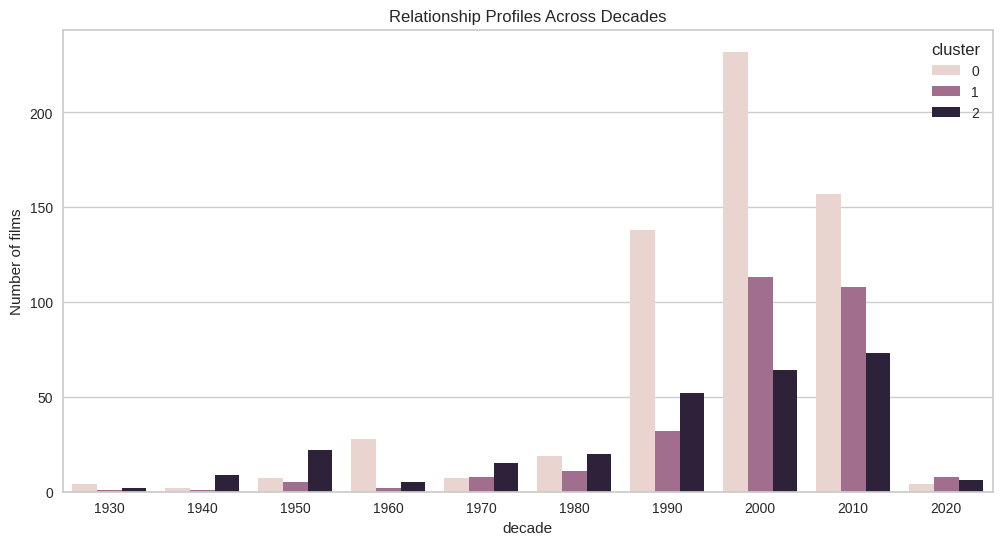

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.countplot(data=df, x="decade", hue="cluster")
plt.title("Relationship Profiles Across Decades")
plt.ylabel("Number of films")
plt.show()
